In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

### Data Collection

In [2]:
df_customers = pd.read_csv('Data/customers.csv')
df_loans = pd.read_csv('Data/loans.csv')
df_bureau = pd.read_csv('Data/bureau_data.csv')

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df = pd.merge(df_customers,df_loans,on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [5]:
df = pd.merge(df,df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [7]:
df['default'] = df['default'].astype(int)

In [8]:
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

### Train Test Split

In [9]:
X = df.drop('default', axis='columns')
y = df['default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train,y_train],axis='columns')
df_test = pd.concat([X_test,y_test],axis='columns')

df_train.shape,df_test.shape

((37500, 33), (12500, 33))

### Data Cleaning 

In [10]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [11]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [12]:
mode_residency = df_train.residence_type.mode()[0]

In [13]:
df_train['residence_type'].fillna(mode_residency,inplace=True)
df_train.residence_type.unique()

C:\Users\Apurv\AppData\Local\Temp\ipykernel_32320\2171111844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['residence_type'].fillna(mode_residency,inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [14]:
df_test['residence_type'].fillna(mode_residency,inplace=True)
df_test.residence_type.unique()

C:\Users\Apurv\AppData\Local\Temp\ipykernel_32320\1953054072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['residence_type'].fillna(mode_residency,inplace=True)


array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [15]:
df_train.duplicated().sum()

np.int64(0)

In [16]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [17]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

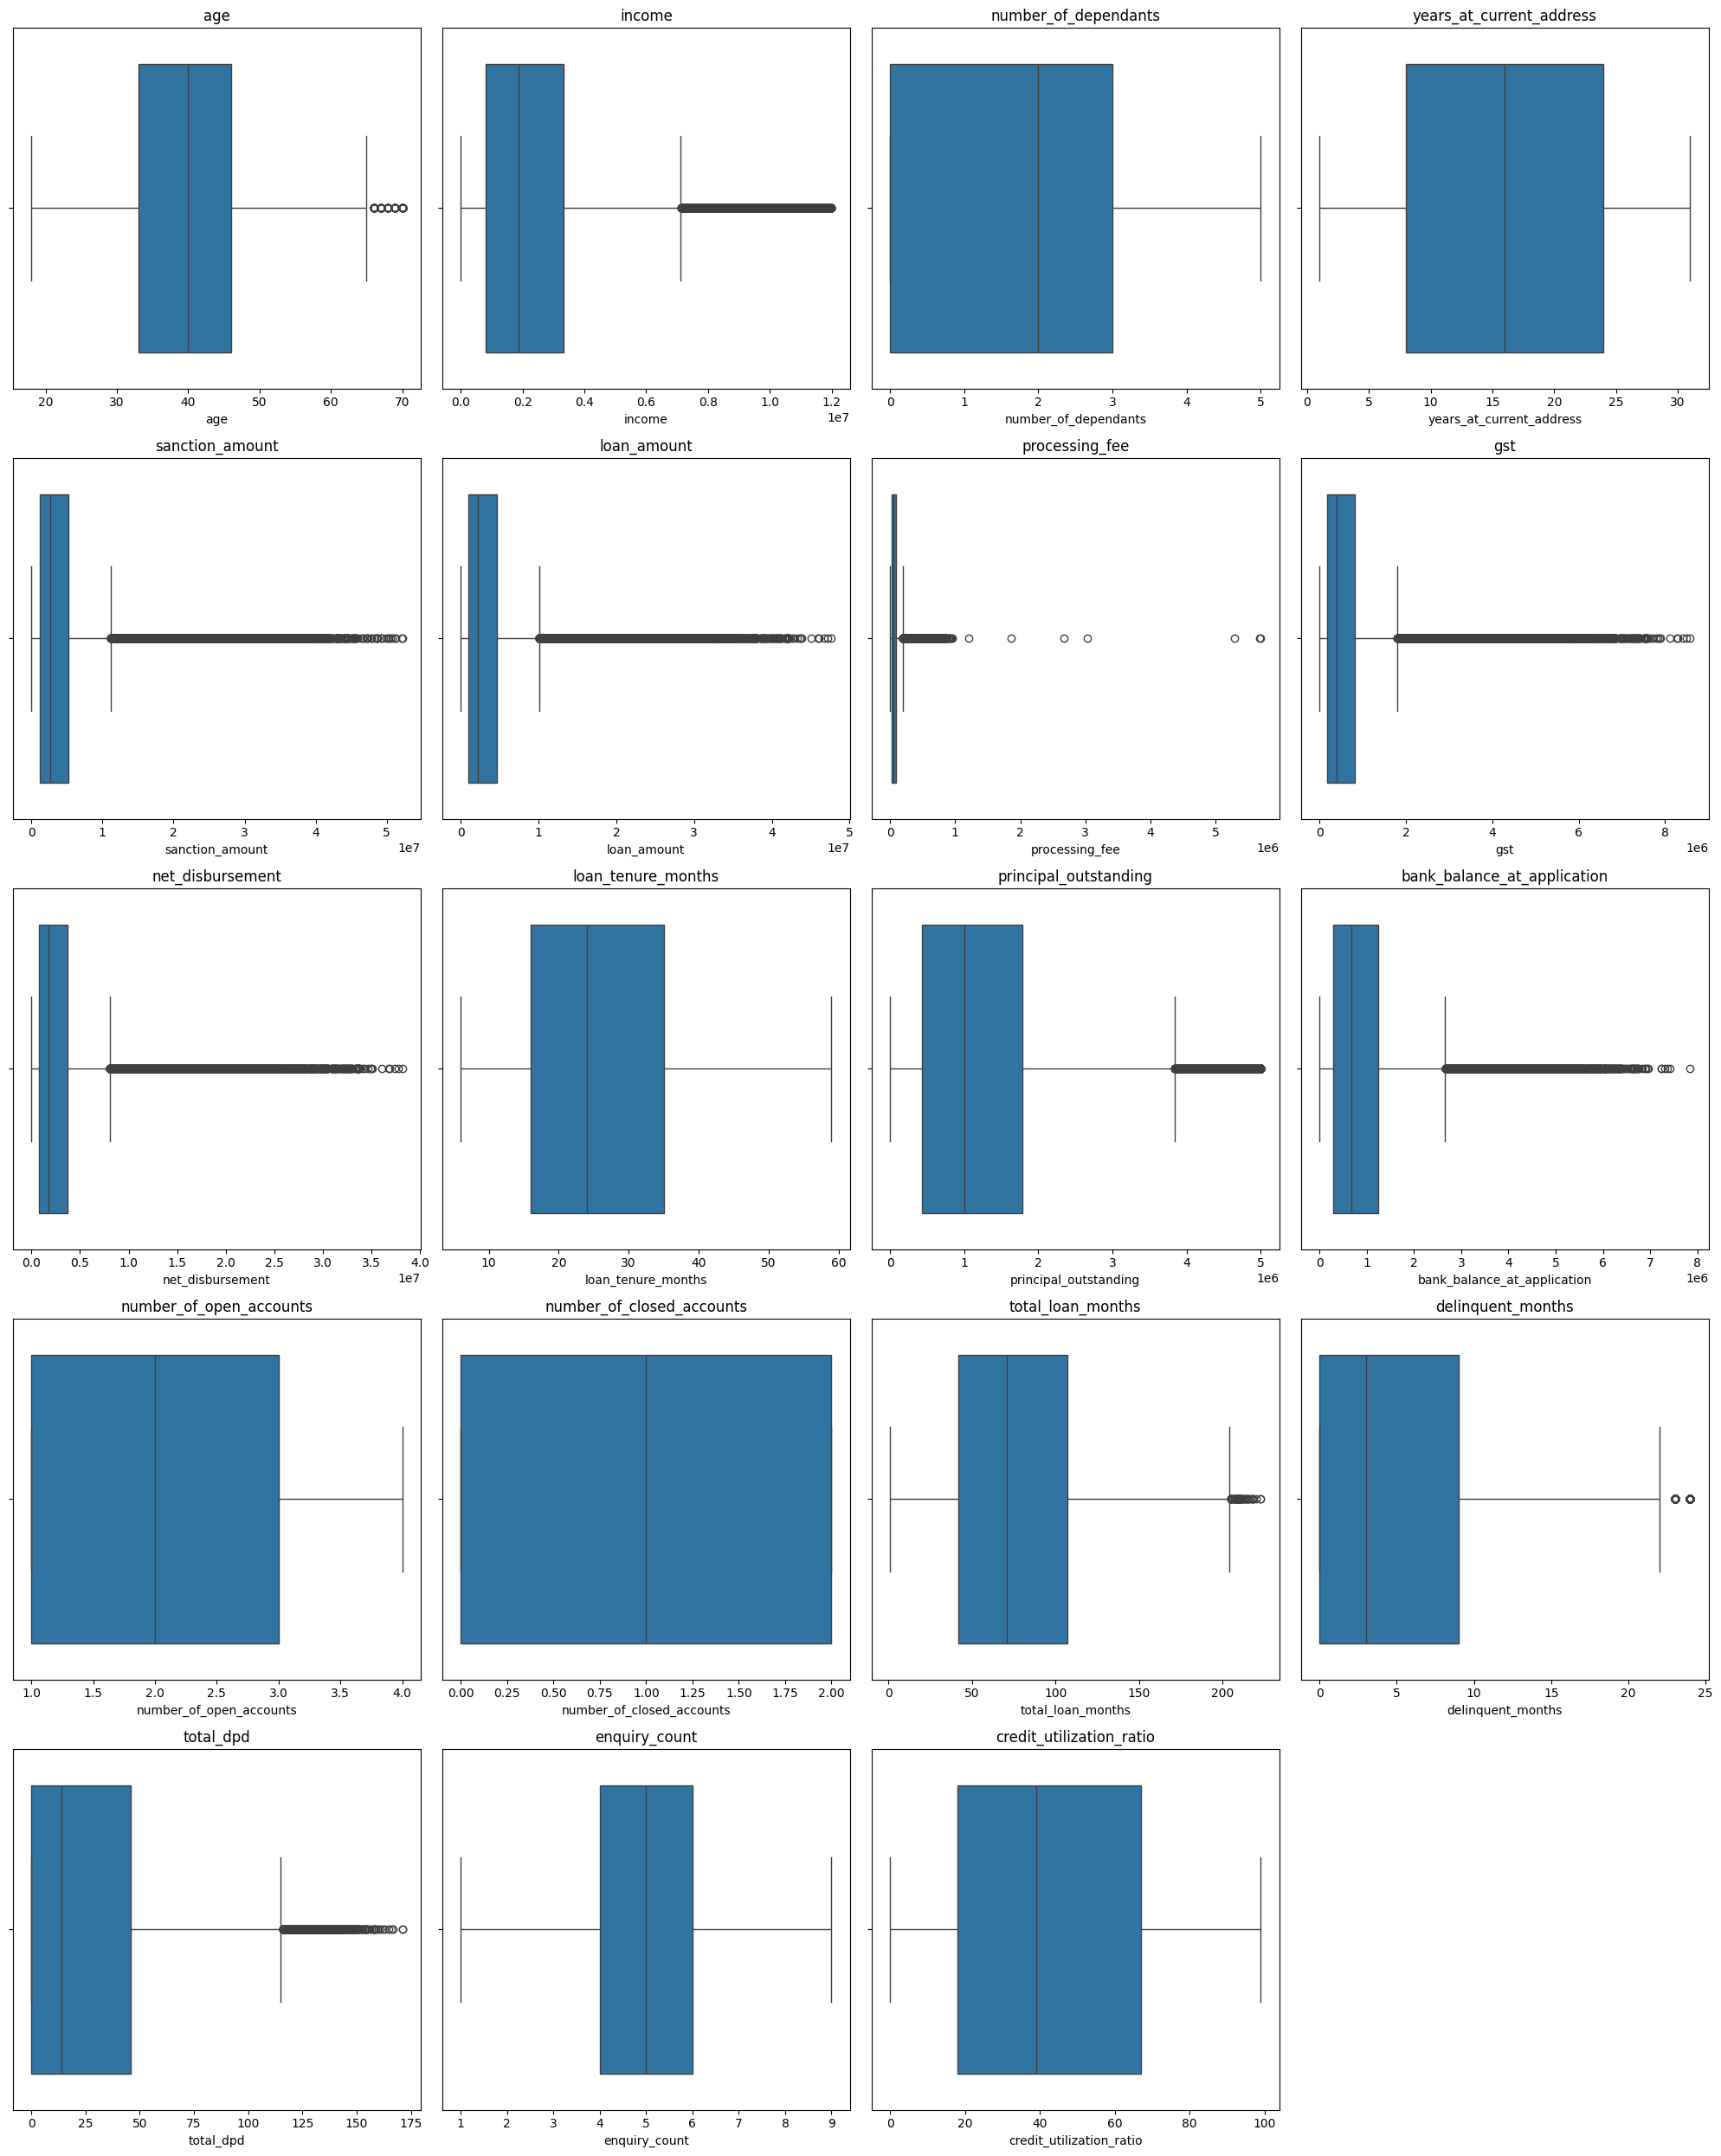

In [18]:
num_plots = len(columns_continuous)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

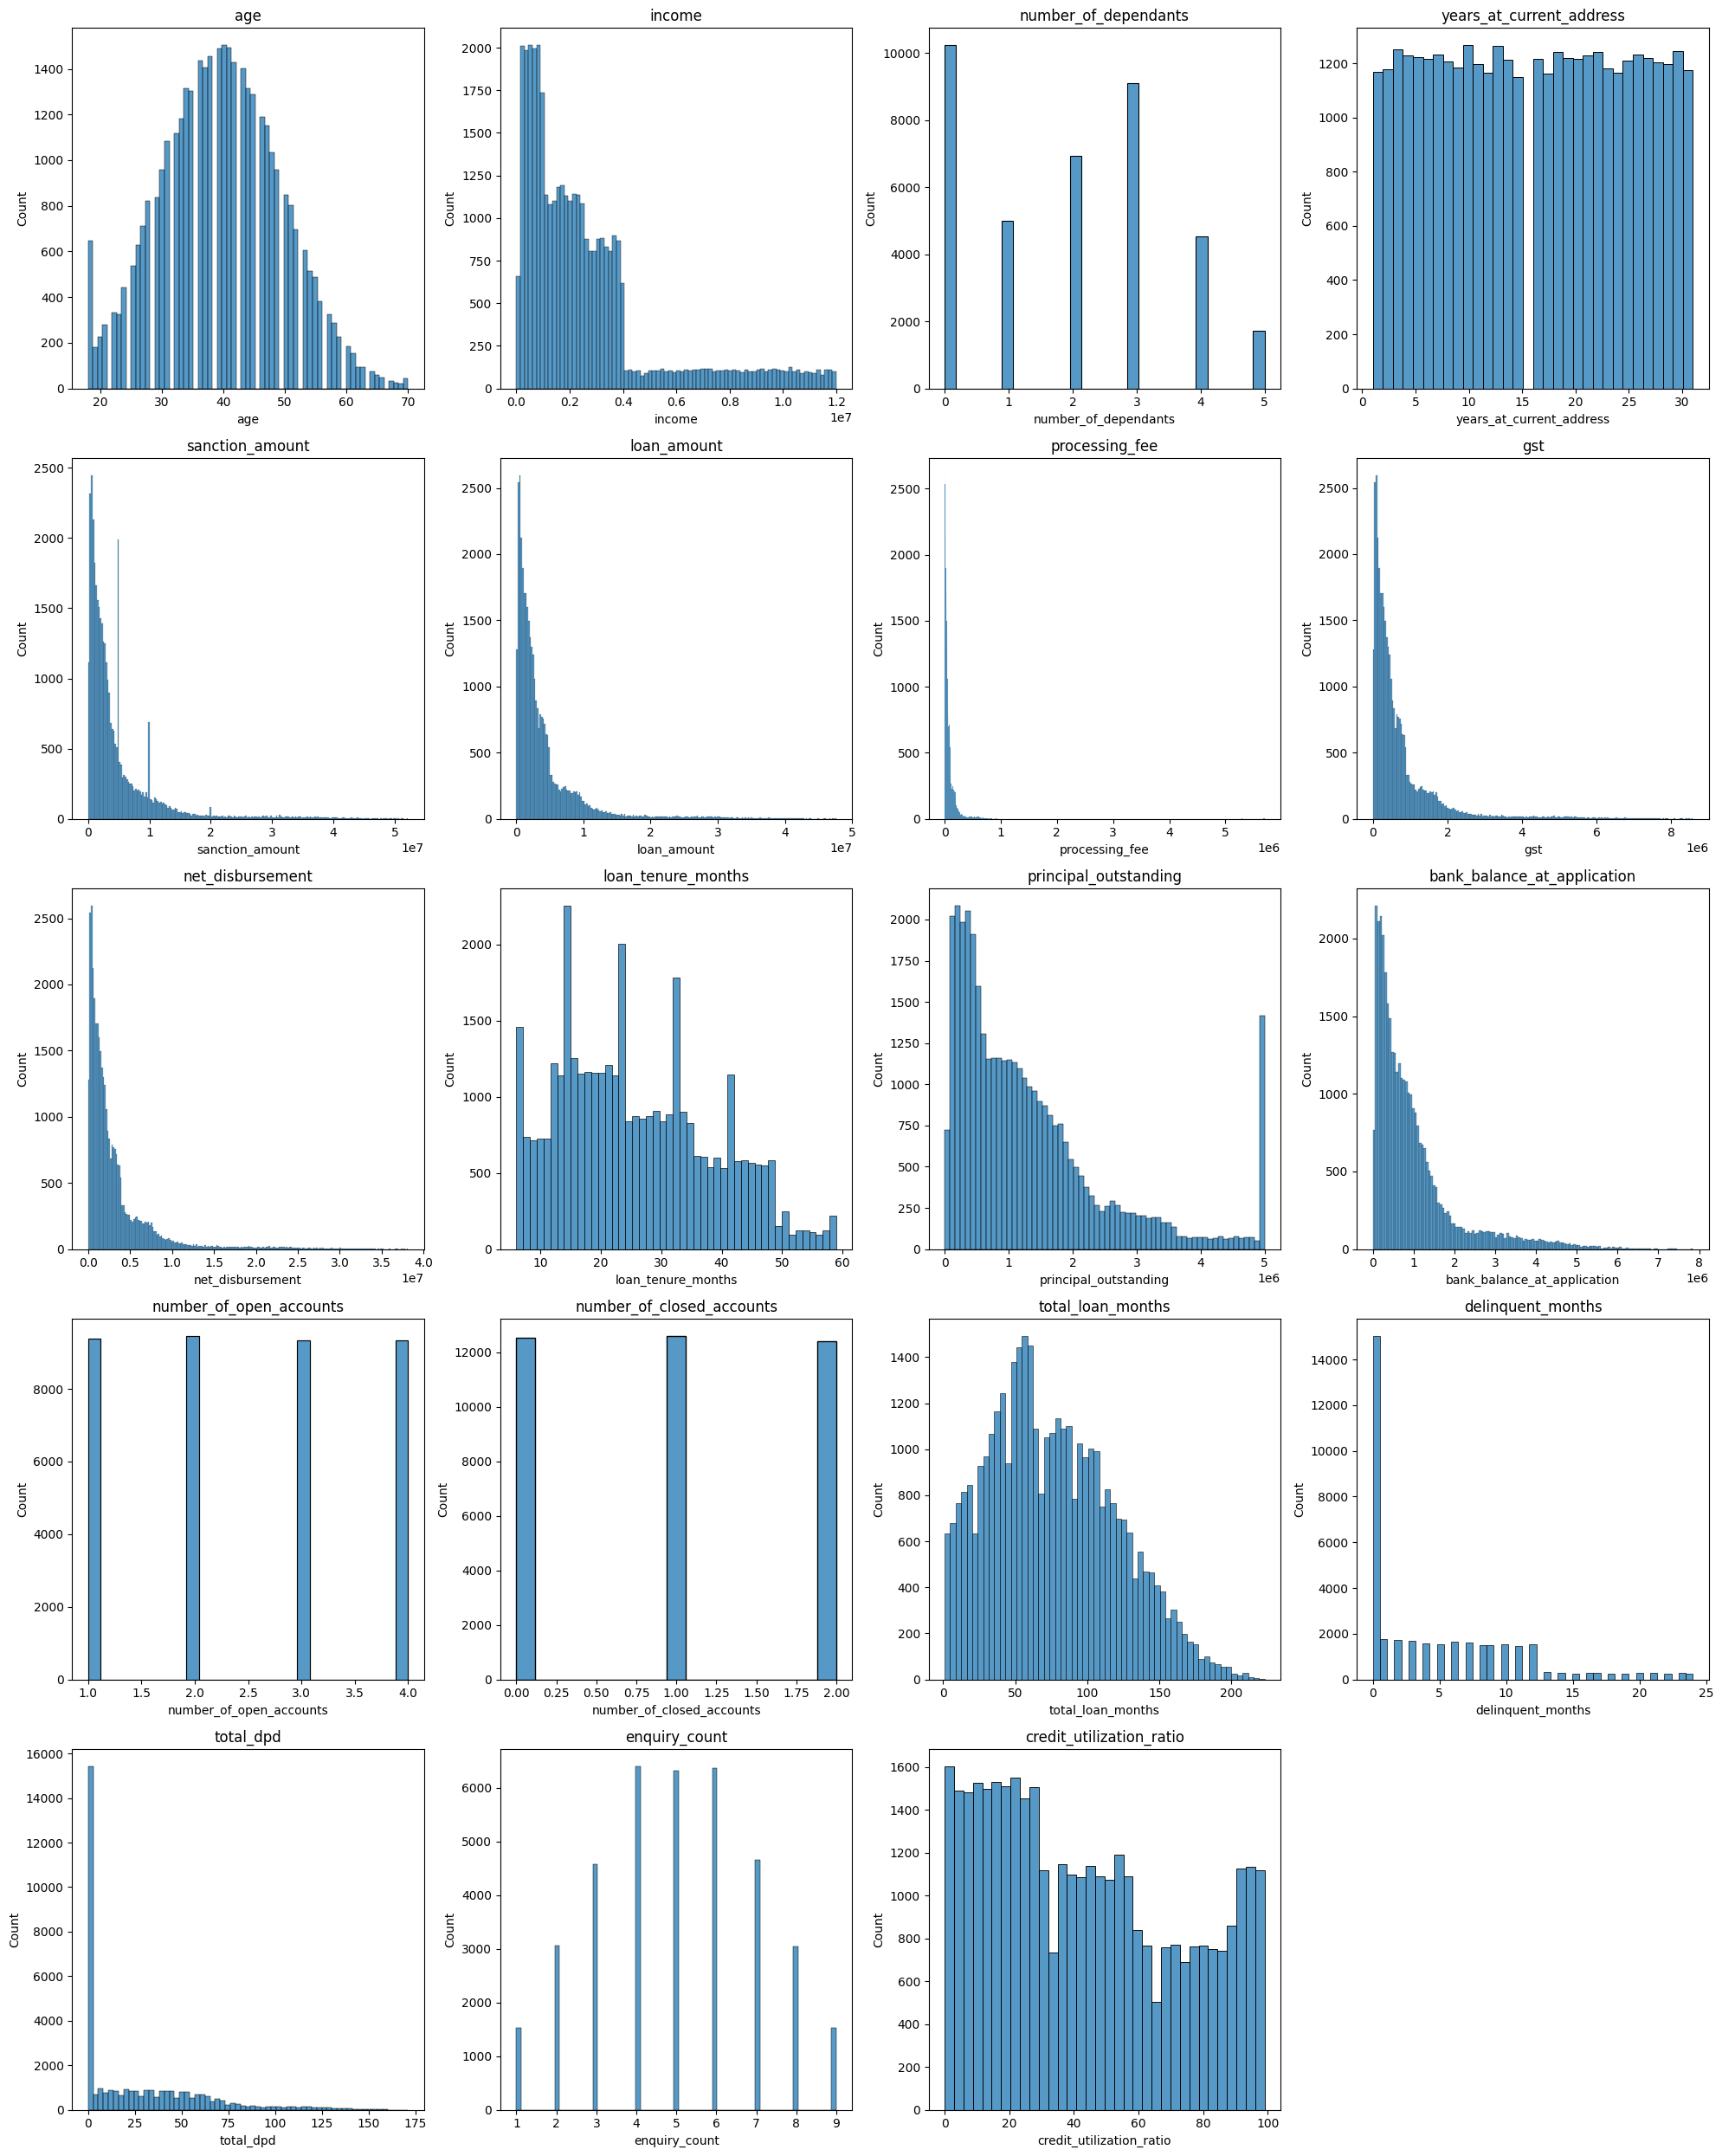

In [19]:
num_plots = len(columns_continuous)
num_cols = 4 
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [20]:
df_train['processing_fee'].describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

In [21]:
df_train[(df_train['processing_fee'] / df_train['loan_amount']) > 0.03]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,2021-12-15,2022-01-14,4,2,154,9,31,6,26,0
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,0
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,2024-04-07,2024-04-15,3,0,112,5,33,3,32,0
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,2022-12-05,2022-12-30,3,1,140,0,0,5,47,0
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,2020-10-15,2020-10-23,1,2,58,0,0,3,86,0
28174,C28175,36,F,Single,Self-Employed,1123000,1,Rented,31,Hyderabad,...,2022-05-18,2022-06-05,3,0,111,8,41,3,62,0
29305,C29306,52,M,Married,Self-Employed,3839000,2,Owned,11,Delhi,...,2022-06-28,2022-07-21,2,2,42,11,65,3,2,0


In [22]:
df_train1 = df_train[(df_train['processing_fee'] / df_train['loan_amount']) < 0.03].copy()
df_train1[(df_train1['processing_fee'] / df_train1['loan_amount']) > 0.03]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [23]:
df_test = df_test[(df_test['processing_fee'] / df_test['loan_amount']) < 0.03].copy()
df_test.shape

(12498, 33)

In [24]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [25]:
for col in columns_categorical:
    print(col,' ---> ',df_train1[col].unique())

gender  --->  ['F' 'M']
marital_status  --->  ['Single' 'Married']
employment_status  --->  ['Salaried' 'Self-Employed']
residence_type  --->  ['Owned' 'Mortgage' 'Rented']
city  --->  ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state  --->  ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode  --->  [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose  --->  ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type  --->  ['Secured' 'Unsecured']
default  --->  [0 1]


In [26]:
df_train1['loan_purpose'] = df_train1['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal','Personal')
df_train1['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

### Exploratory Data Analysis

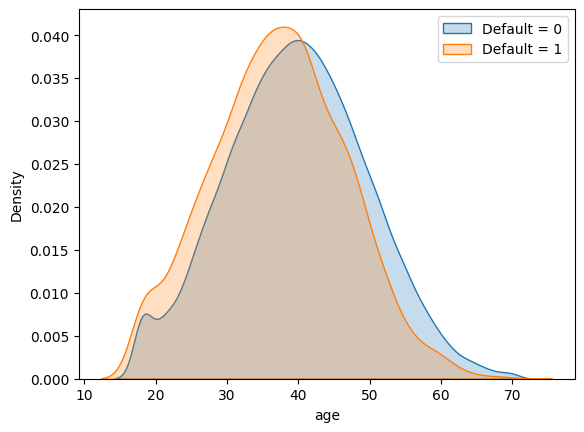

In [27]:
sns.kdeplot(df_train1[df_train1['default'] == 0]['age'],fill=True,label="Default = 0")
sns.kdeplot(df_train1[df_train1['default'] == 1]['age'],fill=True,label="Default = 1")
plt.legend()
plt.show()

Insights 
1. Orange (defaulted) group is slightly shifted to left indicating that younger folks are more likely to default on their loans

### KDE for all Columns

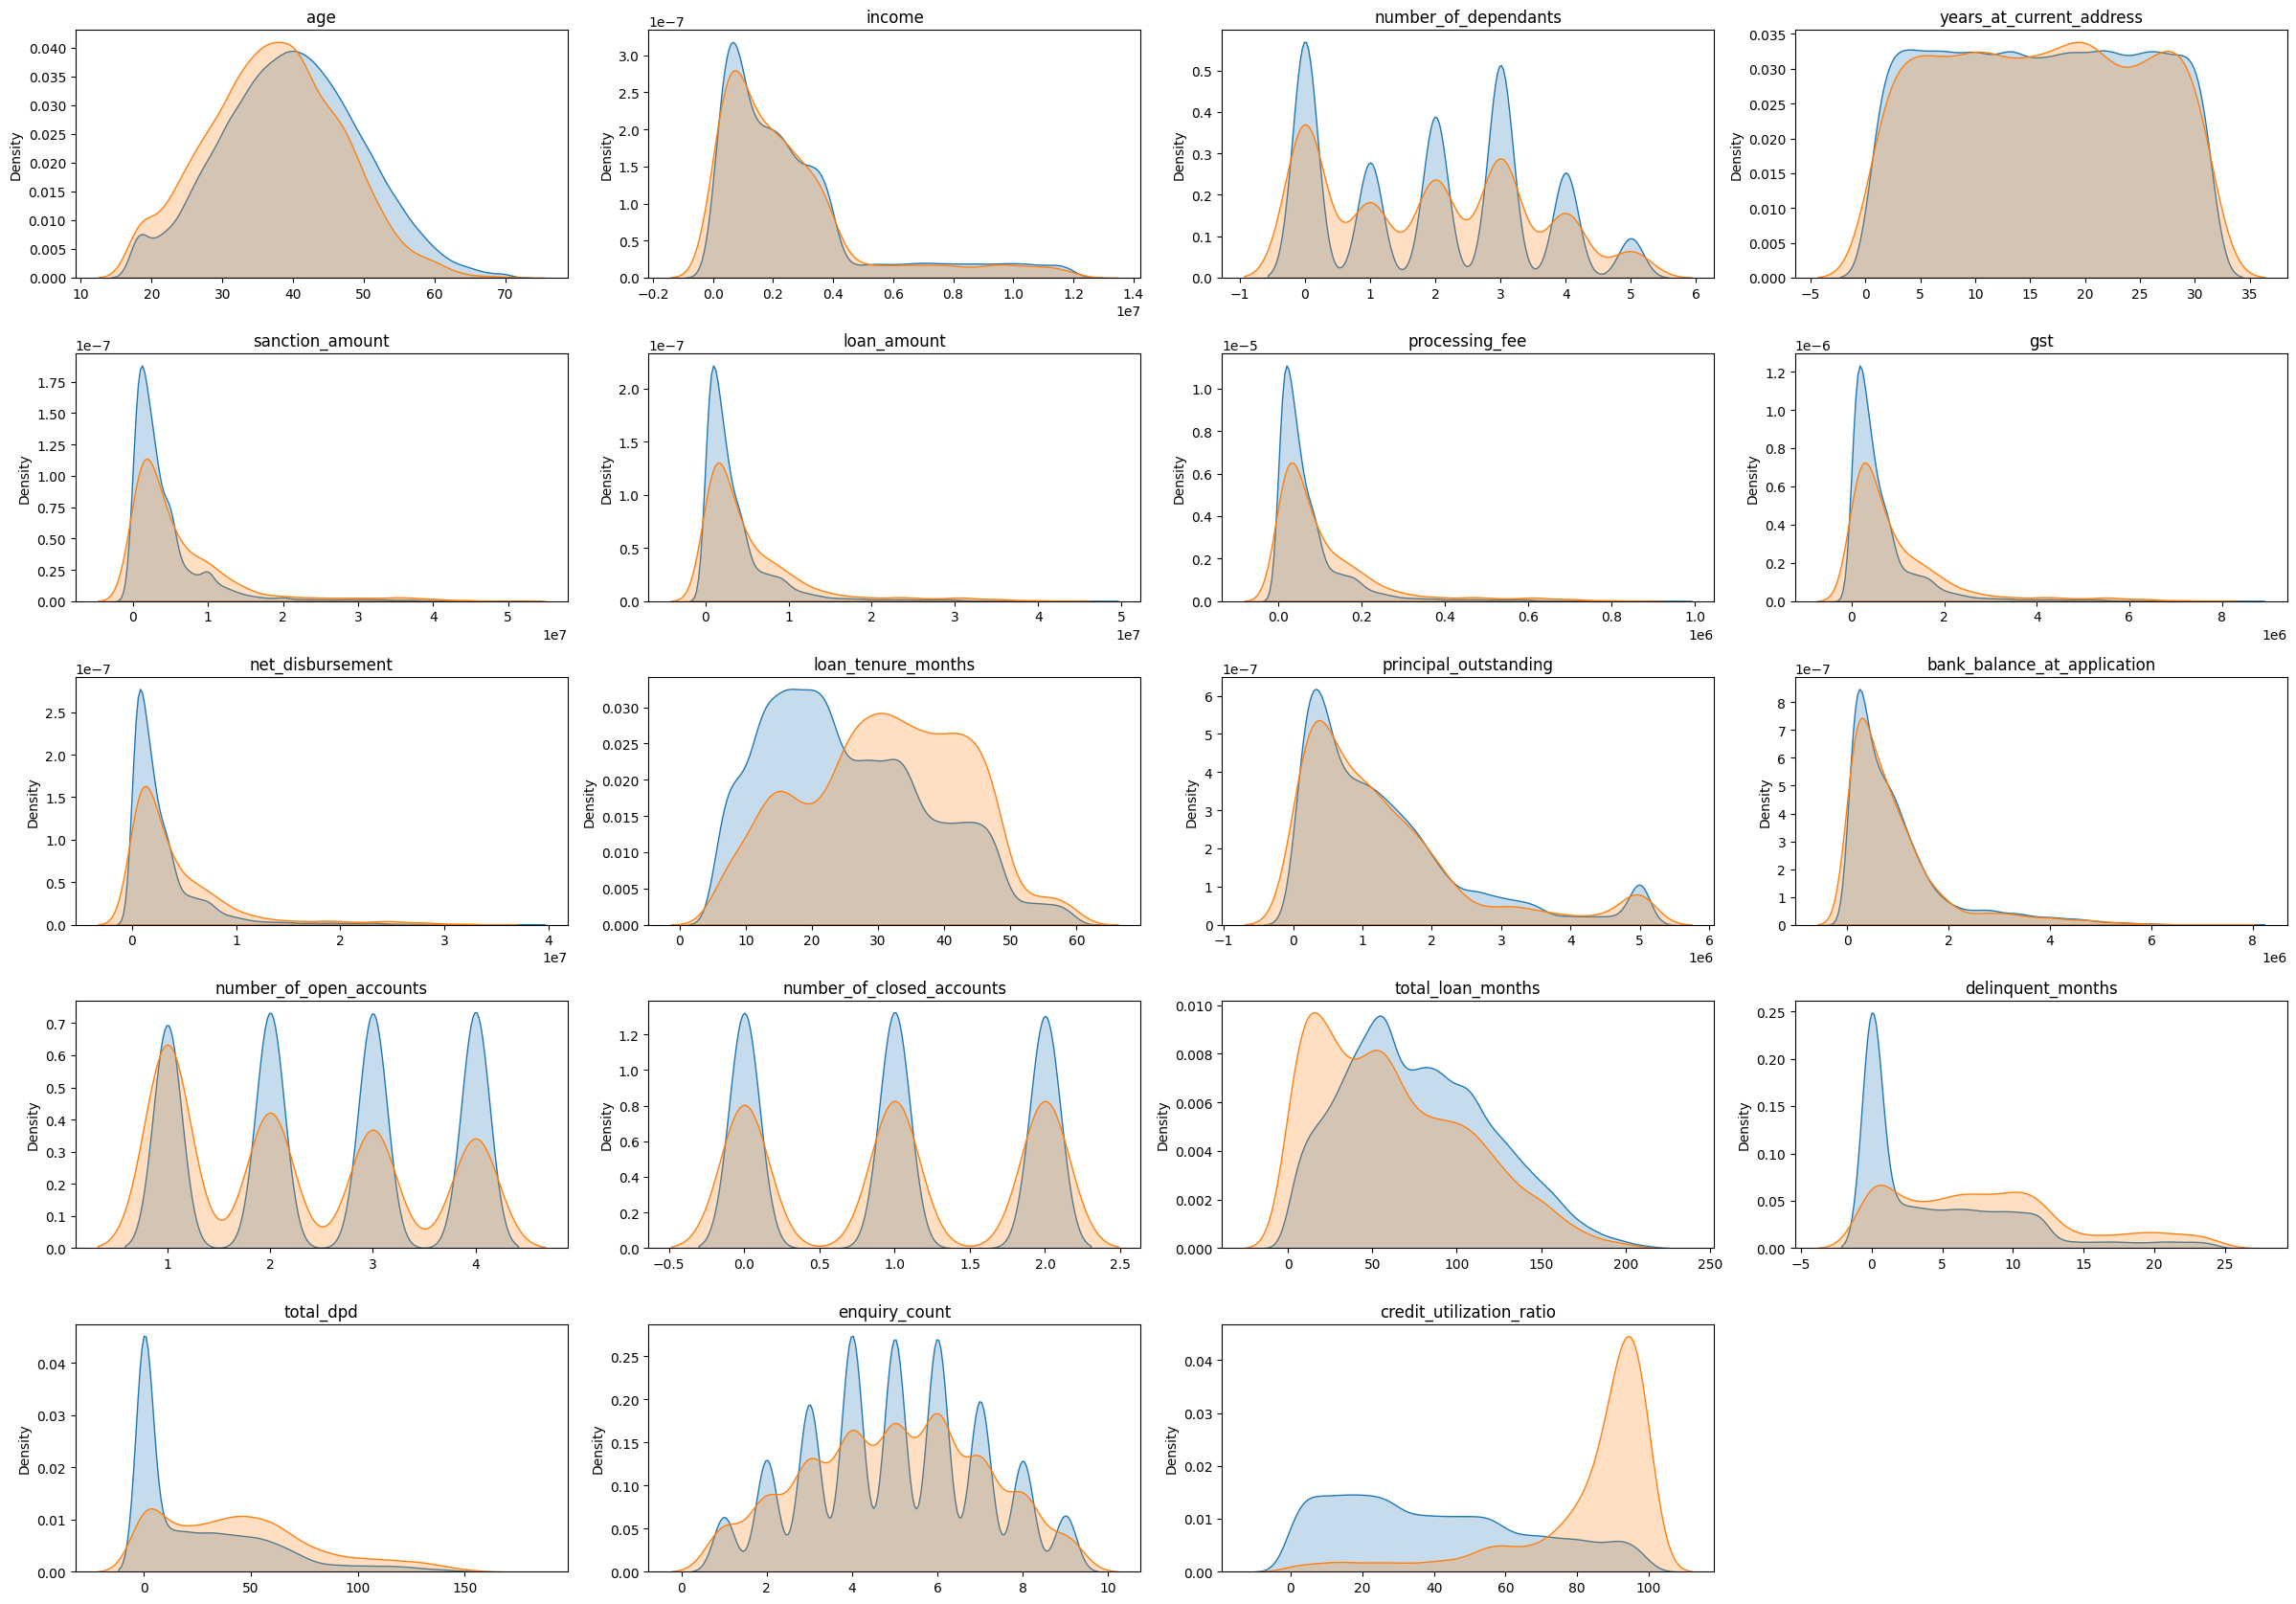

In [28]:
plt.figure(figsize=(24, 20))

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)
    sns.kdeplot(df_train1[col][df_train1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train1[col][df_train1['default']==1], fill=True, label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

### Feature Engineering

In [29]:
df_train1[['loan_amount','income']]

,loan_amount,income
27434,3276000,1131000
13400,2540000,2343000
883,1920000,2891000
7303,298000,272000
45124,260000,141000
...,...,...
11284,4760000,3506000
44732,5302000,3889000
38158,6570000,2420000
860,3194000,2133000


In [30]:
df_train1['loan_to_income'] = round(df_train1['loan_amount'] / df_train1['income'],2)
df_train1['loan_to_income']

27434   2.90
13400   1.08
883     0.66
7303    1.10
45124   1.84
        ... 
11284   1.36
44732   1.36
38158   2.71
860     1.50
15795   0.78
Name: loan_to_income, Length: 37487, dtype: float64

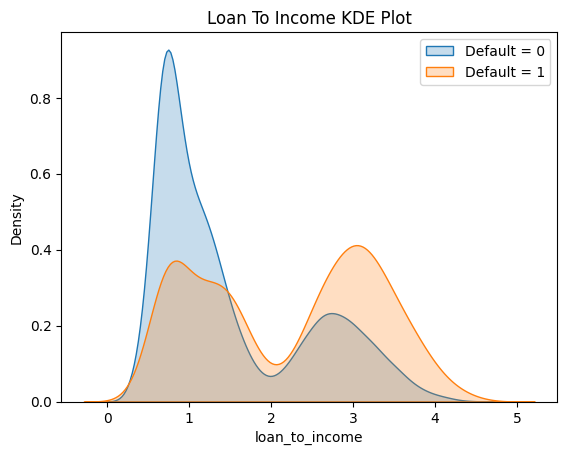

In [31]:
sns.kdeplot(df_train1[df_train1['default'] == 0]['loan_to_income'],fill=True,label="Default = 0")
sns.kdeplot(df_train1[df_train1['default'] == 1]['loan_to_income'],fill=True,label="Default = 1")
plt.title("Loan To Income KDE Plot")
plt.legend()
plt.show()

In [32]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

In [33]:
df_train1[['delinquent_months','total_loan_months']]

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62
...,...,...
11284,23,129
44732,0,80
38158,0,8
860,5,130


In [34]:
df_train1['delinquent_ratio'] = (df_train1['delinquent_months'] * 100 / df_train1['total_loan_months']).round(1)
df_test['delinquent_ratio'] = (df_test['delinquent_months'] * 100 / df_test['total_loan_months']).round(1)
df_train1['delinquent_ratio'], df_test['delinquent_ratio']

(27434    6.70
 13400    3.40
 883     16.90
 7303     0.00
 45124    9.70
          ... 
 11284   17.80
 44732    0.00
 38158    0.00
 860      3.80
 15795    4.90
 Name: delinquent_ratio, Length: 37487, dtype: float64,
 33553    4.30
 9427     0.00
 199      0.00
 12447    0.00
 39489   13.20
          ... 
 9771    16.70
 34737    0.00
 30390    0.00
 6797     5.40
 37270   10.00
 Name: delinquent_ratio, Length: 12498, dtype: float64)

In [35]:
df_test['avg_dpd_per_deliquency'] = np.where(
    df_test['delinquent_months'] != 0
    ,(df_test['total_dpd'] / df_test['delinquent_months']).round(1)
    ,0)
df_test['avg_dpd_per_deliquency'].isna().sum()

np.int64(0)

In [36]:
df_train1['avg_dpd_per_deliquency'] = np.where(
    df_train1['delinquent_months'] != 0
    ,(df_train1['total_dpd'] / df_train1['delinquent_months']).round(1)
    ,0)
df_train1['avg_dpd_per_deliquency'].isna().sum()

np.int64(0)

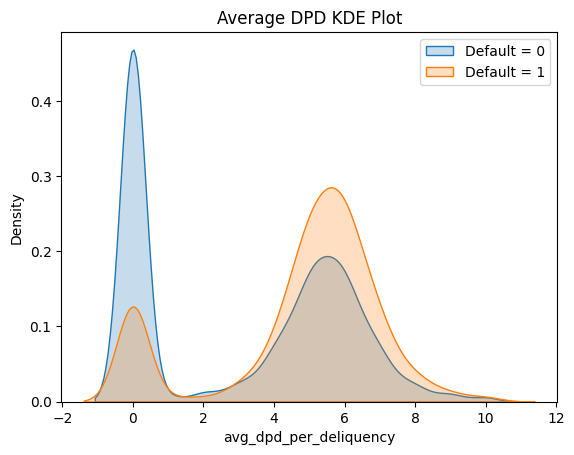

In [37]:
sns.kdeplot(df_train1[df_train1['default'] == 0]['avg_dpd_per_deliquency'],fill=True,label="Default = 0")
sns.kdeplot(df_train1[df_train1['default'] == 1]['avg_dpd_per_deliquency'],fill=True,label="Default = 1")
plt.title("Average DPD KDE Plot")
plt.legend()
plt.show()

### Feature Selection

In [38]:
df_train_2 = df_train1.drop(['cust_id','loan_id'], axis="columns")
df_test = df_test.drop(['cust_id','loan_id'], axis="columns")

In [39]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [40]:
df_train_3.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [41]:
X_train = df_train_3.drop('default',axis='columns')
y_train = df_train_3['default']

col_to_scale = df_train_3.select_dtypes(['int64','float64']).columns
col_to_scale = col_to_scale.drop('default')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[col_to_scale] = scaler.fit_transform(X_train[col_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_deliquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [42]:
X_test = df_test.drop('default',axis='columns')
y_test = df_test['default']

X_test[col_to_scale] = scaler.transform(X_test[col_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_deliquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Variance Inflation Factor to measure MultiColinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [44]:
calculate_vif(X_train[col_to_scale])

C:\Users\Apurv\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,102.15
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.28


In [45]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [46]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.45
1,number_of_dependants,2.73
2,years_at_current_address,3.41
3,zipcode,3.77
4,loan_tenure_months,5.98
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.32
7,number_of_closed_accounts,2.35
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


In [47]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_deliquency'], dtype=object)

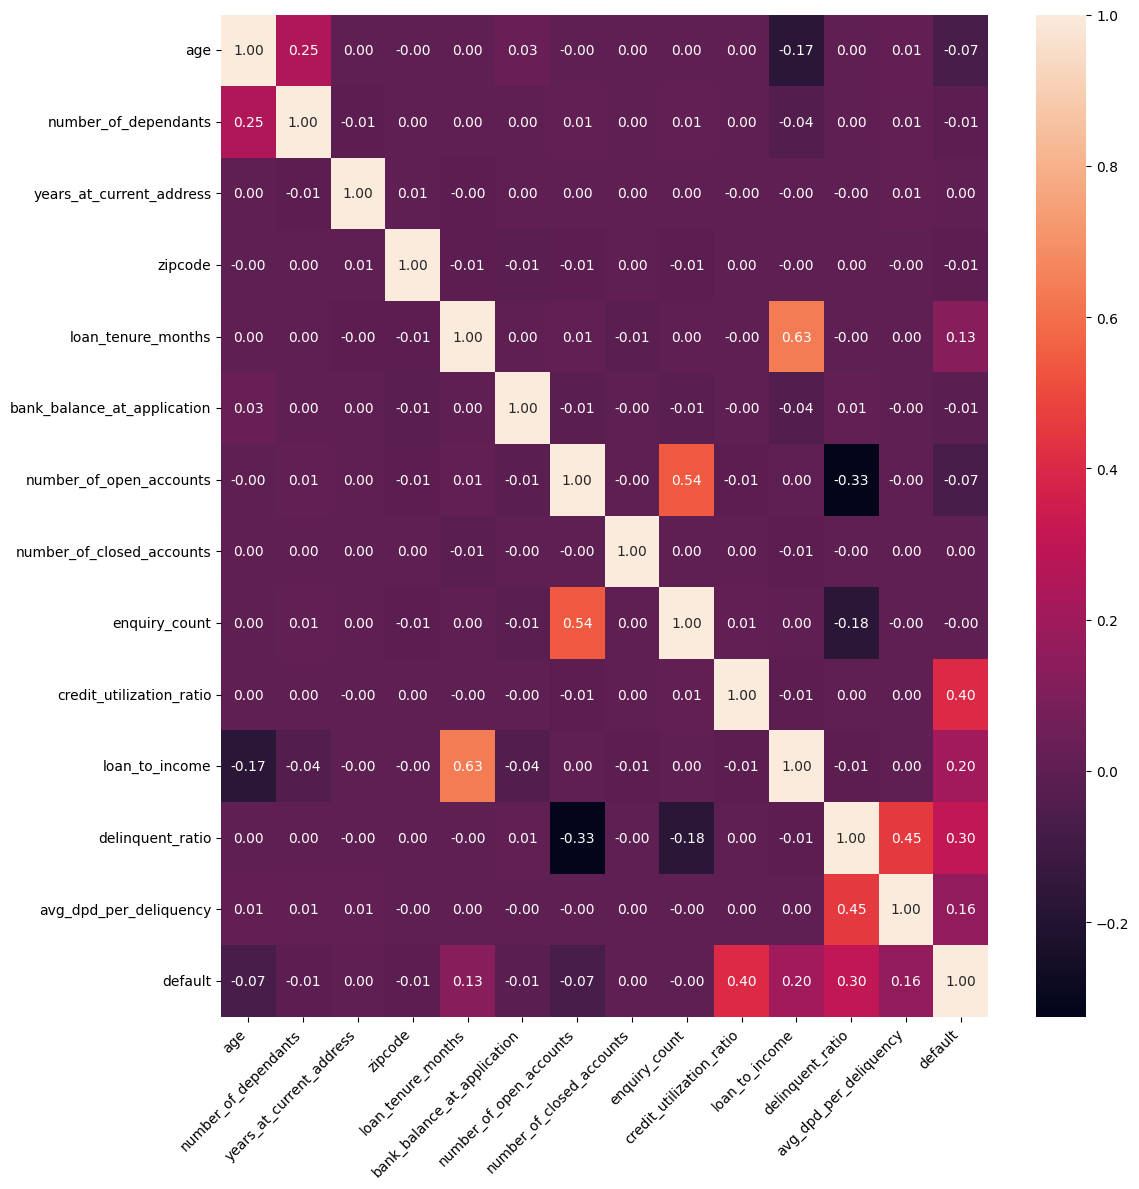

In [48]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.10,0.21,-0.75,0.08
Education,5626,546,5080,0.17,0.15,0.14,0.00
Home,11271,1744,9527,0.55,0.28,0.68,0.18
Personal,13153,585,12568,0.18,0.37,-0.69,0.13


In [50]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4915664

In [51]:
iv_df = pd.DataFrame(list(iv_values.items()),columns=['Feature','IV'])
iv_df = iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.42
19,delinquent_ratio,0.68
18,loan_to_income,0.49
20,avg_dpd_per_deliquency,0.42
10,loan_purpose,0.39
5,residence_type,0.26
12,loan_tenure_months,0.23
11,loan_type,0.17
0,age,0.08
14,number_of_open_accounts,0.07


In [52]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_ratio',
 'avg_dpd_per_deliquency']

### Feature Encoding 

In [53]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [54]:
X_train_encoded = pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced,drop_first=True)

## Model Training

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded,y_train)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded,y_train)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.70      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.85      0.88     12498
weighted avg       0.96      0.96      0.96     12498



### Randomized Search with Logistic Regression

In [57]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
Best Score: 0.7629160071967581
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



### Randomized Search with XGBoost

In [58]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.7916996030173474
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



### Handling Class Imbalance

In [59]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus = rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_rus,y_train_rus)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [61]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11390
           1       0.53      0.98      0.69      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.95      0.82     12498
weighted avg       0.96      0.92      0.93     12498



### Handling Class Imbalance using Oversampling

In [62]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt,y_train_smt = smt.fit_resample(X_train_encoded,y_train)
y_train_smt.value_counts()

default
0    34223
1    34223
Name: count, dtype: int64

In [63]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     11390
           1       0.60      0.95      0.74      1108

    accuracy                           0.94     12498
   macro avg       0.80      0.94      0.85     12498
weighted avg       0.96      0.94      0.95     12498



### Parameter Tunning Using Optuna

In [65]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [66]:
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-09-28 18:20:31,158] A new study created in memory with name: no-name-2e2f73a2-301d-4765-9958-e94ad02e2a18
[I 2025-09-28 18:20:31,290] Trial 0 finished with value: 0.9182809819930474 and parameters: {'C': 0.008953762713274135, 'solver': 'liblinear', 'tol': 0.00562735666016396, 'class_weight': None}. Best is trial 0 with value: 0.9182809819930474.
[I 2025-09-28 18:20:31,412] Trial 1 finished with value: 0.9255514209483285 and parameters: {'C': 0.006527065021485643, 'solver': 'newton-cg', 'tol': 8.4070501225314e-06, 'class_weight': None}. Best is trial 1 with value: 0.9255514209483285.
[I 2025-09-28 18:20:31,506] Trial 2 finished with value: 0.8689310725425369 and parameters: {'C': 0.0003854708335361216, 'solver': 'newton-cg', 'tol': 0.00024024897701472805, 'class_weight': None}. Best is trial 1 with value: 0.9255514209483285.
[I 2025-09-28 18:20:31,596] Trial 3 finished with value: 0.9395075809421055 and parameters: {'C': 153.03151211966048, 'solver': 'lbfgs', 'tol': 0.0024358790

In [67]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9450643112356775
  Params: 
    C: 17.10547510652245
    solver: liblinear
    tol: 0.013065404059164698
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [68]:
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-09-28 18:23:34,285] A new study created in memory with name: no-name-2384bff5-2e7a-4ff7-ae0f-c00704d3f7ef
[I 2025-09-28 18:23:34,802] Trial 0 finished with value: 0.9636815894374849 and parameters: {'lambda': 3.1614990996499124, 'alpha': 0.021969079991045564, 'subsample': 0.787413317262593, 'colsample_bytree': 0.8981145685757017, 'max_depth': 7, 'eta': 0.22947654510735913, 'gamma': 7.757243902153972, 'scale_pos_weight': 6.653907651845012, 'min_child_weight': 2, 'max_delta_step': 4}. Best is trial 0 with value: 0.9636815894374849.
[I 2025-09-28 18:23:35,513] Trial 1 finished with value: 0.9689864969227947 and parameters: {'lambda': 0.44385613214141445, 'alpha': 0.002462284844957689, 'subsample': 0.8854528358536873, 'colsample_bytree': 0.8492095081264108, 'max_depth': 8, 'eta': 0.12107054799598149, 'gamma': 2.5412152364099327, 'scale_pos_weight': 8.217604288858682, 'min_child_weight': 3, 'max_delta_step': 10}. Best is trial 1 with value: 0.9689864969227947.
[I 2025-09-28 18:23:36

In [69]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9763987401956865
  Params: 
    lambda: 0.02153235960479549
    alpha: 0.24370668376181187
    subsample: 0.831782530758699
    colsample_bytree: 0.44460923829037446
    max_depth: 10
    eta: 0.19531340204749476
    gamma: 0.031392436277929384
    scale_pos_weight: 1.7845355492212887
    min_child_weight: 1
    max_delta_step: 5
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.75      0.81      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.87      0.89      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [70]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



### ROC AUC Curve

In [71]:
from sklearn.metrics import roc_curve
probabilites = best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr,tpr,threshold = roc_curve(y_test,probabilites)
fpr[:10],tpr[:10],threshold[:10]

(array([0.        , 0.        , 0.        , 0.0000878 , 0.0000878 ,
        0.00017559, 0.00017559, 0.00026339, 0.00026339, 0.00035119]),
 array([0.        , 0.00090253, 0.20577617, 0.20577617, 0.23375451,
        0.23375451, 0.26895307, 0.26895307, 0.29963899, 0.29963899]),
 array([       inf, 0.99999976, 0.99800818, 0.99799548, 0.99727409,
        0.99722735, 0.99603987, 0.99603382, 0.99520048, 0.99506326]))

In [72]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.982998339160008

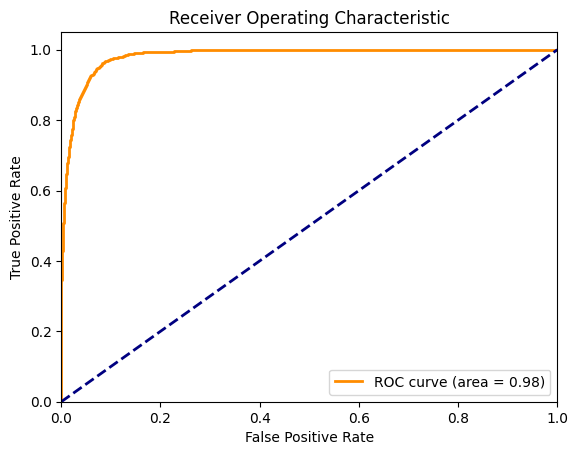

In [73]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model Evaluation: Rankorder & KS Statistics

In [78]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
33553,0,0.00
9427,0,0.75
199,0,0.16


In [79]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.00,1
9427,0,0.75,8
199,0,0.16,7


In [80]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.00
mean       0.50
std        0.17
min        0.24
25%        0.35
50%        0.49
75%        0.66
max        0.81
Name: Default Probability, dtype: float64

In [81]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\Apurv\AppData\Local\Temp\ipykernel_32320\4037021561.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.00,0.00,0.00,1250.00
1,1,0.00,0.00,0.00,1250.00
2,2,0.00,0.00,0.00,1250.00
3,3,0.00,0.00,0.00,1249.00
4,4,0.00,0.00,0.00,1250.00
5,5,0.00,0.01,1.00,1249.00
6,6,0.01,0.04,3.00,1246.00
7,7,0.04,0.24,18.00,1232.00
8,8,0.24,0.81,169.00,1081.00
9,9,0.81,1.00,917.00,333.00


In [82]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.00,0.00,0.00,1250.00,0.00,100.00
1,1,0.00,0.00,0.00,1250.00,0.00,100.00
2,2,0.00,0.00,0.00,1250.00,0.00,100.00
3,3,0.00,0.00,0.00,1249.00,0.00,100.00
4,4,0.00,0.00,0.00,1250.00,0.00,100.00
5,5,0.00,0.01,1.00,1249.00,0.08,99.92
6,6,0.01,0.04,3.00,1246.00,0.24,99.76
7,7,0.04,0.24,18.00,1232.00,1.44,98.56
8,8,0.24,0.81,169.00,1081.00,13.52,86.48
9,9,0.81,1.00,917.00,333.00,73.36,26.64


In [83]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.81,1.00,917.00,333.00,73.36,26.64
1,8,0.24,0.81,169.00,1081.00,13.52,86.48
2,7,0.04,0.24,18.00,1232.00,1.44,98.56
3,6,0.01,0.04,3.00,1246.00,0.24,99.76
4,5,0.00,0.01,1.00,1249.00,0.08,99.92
5,4,0.00,0.00,0.00,1250.00,0.00,100.00
6,3,0.00,0.00,0.00,1249.00,0.00,100.00
7,2,0.00,0.00,0.00,1250.00,0.00,100.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00


In [84]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.81,1.00,917.00,333.00,73.36,26.64,917.00,333.00
1,8,0.24,0.81,169.00,1081.00,13.52,86.48,1086.00,1414.00
2,7,0.04,0.24,18.00,1232.00,1.44,98.56,1104.00,2646.00
3,6,0.01,0.04,3.00,1246.00,0.24,99.76,1107.00,3892.00
4,5,0.00,0.01,1.00,1249.00,0.08,99.92,1108.00,5141.00
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,6391.00
6,3,0.00,0.00,0.00,1249.00,0.00,100.00,1108.00,7640.00
7,2,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,8890.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,10140.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,11390.00


In [85]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.81,1.00,917.00,333.00,73.36,26.64,917.00,333.00,82.76,2.92
1,8,0.24,0.81,169.00,1081.00,13.52,86.48,1086.00,1414.00,98.01,12.41
2,7,0.04,0.24,18.00,1232.00,1.44,98.56,1104.00,2646.00,99.64,23.23
3,6,0.01,0.04,3.00,1246.00,0.24,99.76,1107.00,3892.00,99.91,34.17
4,5,0.00,0.01,1.00,1249.00,0.08,99.92,1108.00,5141.00,100.00,45.14
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,6391.00,100.00,56.11
6,3,0.00,0.00,0.00,1249.00,0.00,100.00,1108.00,7640.00,100.00,67.08
7,2,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,8890.00,100.00,78.05
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,10140.00,100.00,89.03
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,11390.00,100.00,100.00


In [86]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.81,1.00,917.00,333.00,73.36,26.64,917.00,333.00,82.76,2.92,79.84
1,8,0.24,0.81,169.00,1081.00,13.52,86.48,1086.00,1414.00,98.01,12.41,85.60
2,7,0.04,0.24,18.00,1232.00,1.44,98.56,1104.00,2646.00,99.64,23.23,76.41
3,6,0.01,0.04,3.00,1246.00,0.24,99.76,1107.00,3892.00,99.91,34.17,65.74
4,5,0.00,0.01,1.00,1249.00,0.08,99.92,1108.00,5141.00,100.00,45.14,54.86
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,6391.00,100.00,56.11,43.89
6,3,0.00,0.00,0.00,1249.00,0.00,100.00,1108.00,7640.00,100.00,67.08,32.92
7,2,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,8890.00,100.00,78.05,21.95
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,10140.00,100.00,89.03,10.97
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1108.00,11390.00,100.00,100.00,0.00


In [88]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.982998339160008
Gini Coefficient: 0.965996678320016


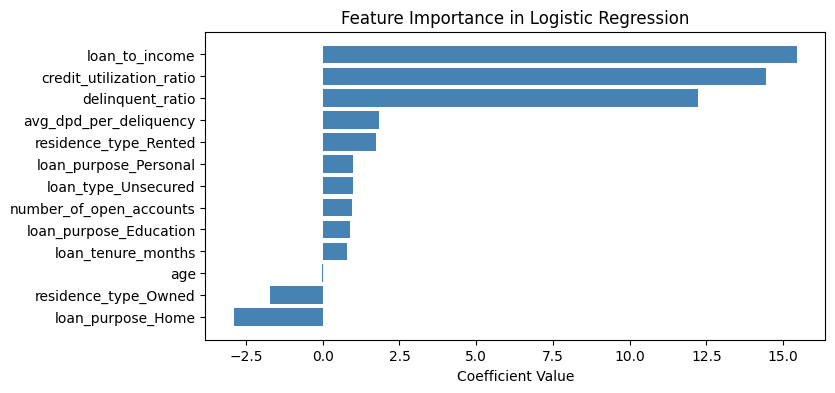

In [87]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [89]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': col_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']